In [1]:
import pandas as pd

In [ ]:
# https://www.donga.com/news/article/all/20220623/114082469/1
# 동아일보
# 최근 10년간 연료별 승용차 판매량 추이. 출처=카이즈유데이터연구소
# 년도, 휘발유, 경유, 엘피지, 하이브리드, 전기, 기타(수소), 전체

In [3]:
year = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
gasoline = [654937,662554,681747,747987,758344,776723,851742,963864,889148,350484]
diesel = [457883,570979,718356,640204,571114,557692,431662,398360,258763,82295]
lpg = [155402,140404,124170,110731,127308,105741,116410,105068,81382,23533]
hybrid = [29060,34572,39020,62212,84699,93410,103494,152858,184799,87472]
electricity = [613,1320,2931,5148,14224,31033,33390,31297,71505,39628]
etc_hydrogen = [0,6,42,59,83,729,4182,5783,8473,3720]
total = [1297895,1409835,1566266,1566341,1555772,1565328,1540880,1657230,1494070,587132]

In [42]:
df = pd.DataFrame({
    '년도' : year, 
    '휘발유' : gasoline, 
    '경유' : diesel, 
    '엘피지' : lpg, 
    '하이브리드' : hybrid, 
    '전기' : electricity, 
    '수소' : etc_hydrogen, 
    '전체' : total
})

df

,년도,휘발유,경유,엘피지,하이브리드,전기,수소,전체
0,2013,654937,457883,155402,29060,613,0,1297895
1,2014,662554,570979,140404,34572,1320,6,1409835
2,2015,681747,718356,124170,39020,2931,42,1566266
3,2016,747987,640204,110731,62212,5148,59,1566341
4,2017,758344,571114,127308,84699,14224,83,1555772
5,2018,776723,557692,105741,93410,31033,729,1565328
6,2019,851742,431662,116410,103494,33390,4182,1540880
7,2020,963864,398360,105068,152858,31297,5783,1657230
8,2021,889148,258763,81382,184799,71505,8473,1494070
9,2022,350484,82295,23533,87472,39628,3720,587132


In [43]:
# 2015~
df_15 = df.iloc[2:, :7]
df_15.reset_index(inplace=True, drop=True)

In [44]:
df_15

,년도,휘발유,경유,엘피지,하이브리드,전기,수소
0,2015,681747,718356,124170,39020,2931,42
1,2016,747987,640204,110731,62212,5148,59
2,2017,758344,571114,127308,84699,14224,83
3,2018,776723,557692,105741,93410,31033,729
4,2019,851742,431662,116410,103494,33390,4182
5,2020,963864,398360,105068,152858,31297,5783
6,2021,889148,258763,81382,184799,71505,8473
7,2022,350484,82295,23533,87472,39628,3720


In [61]:
df_15.to_csv('./data/rawdata/연료별_자동차판매량.csv', index=False)

## 연료별 점유율의 변화

In [13]:
import matplotlib.pyplot as plt

C:\Users\admin\AppData\Local\Temp\ipykernel_7892\2419838351.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


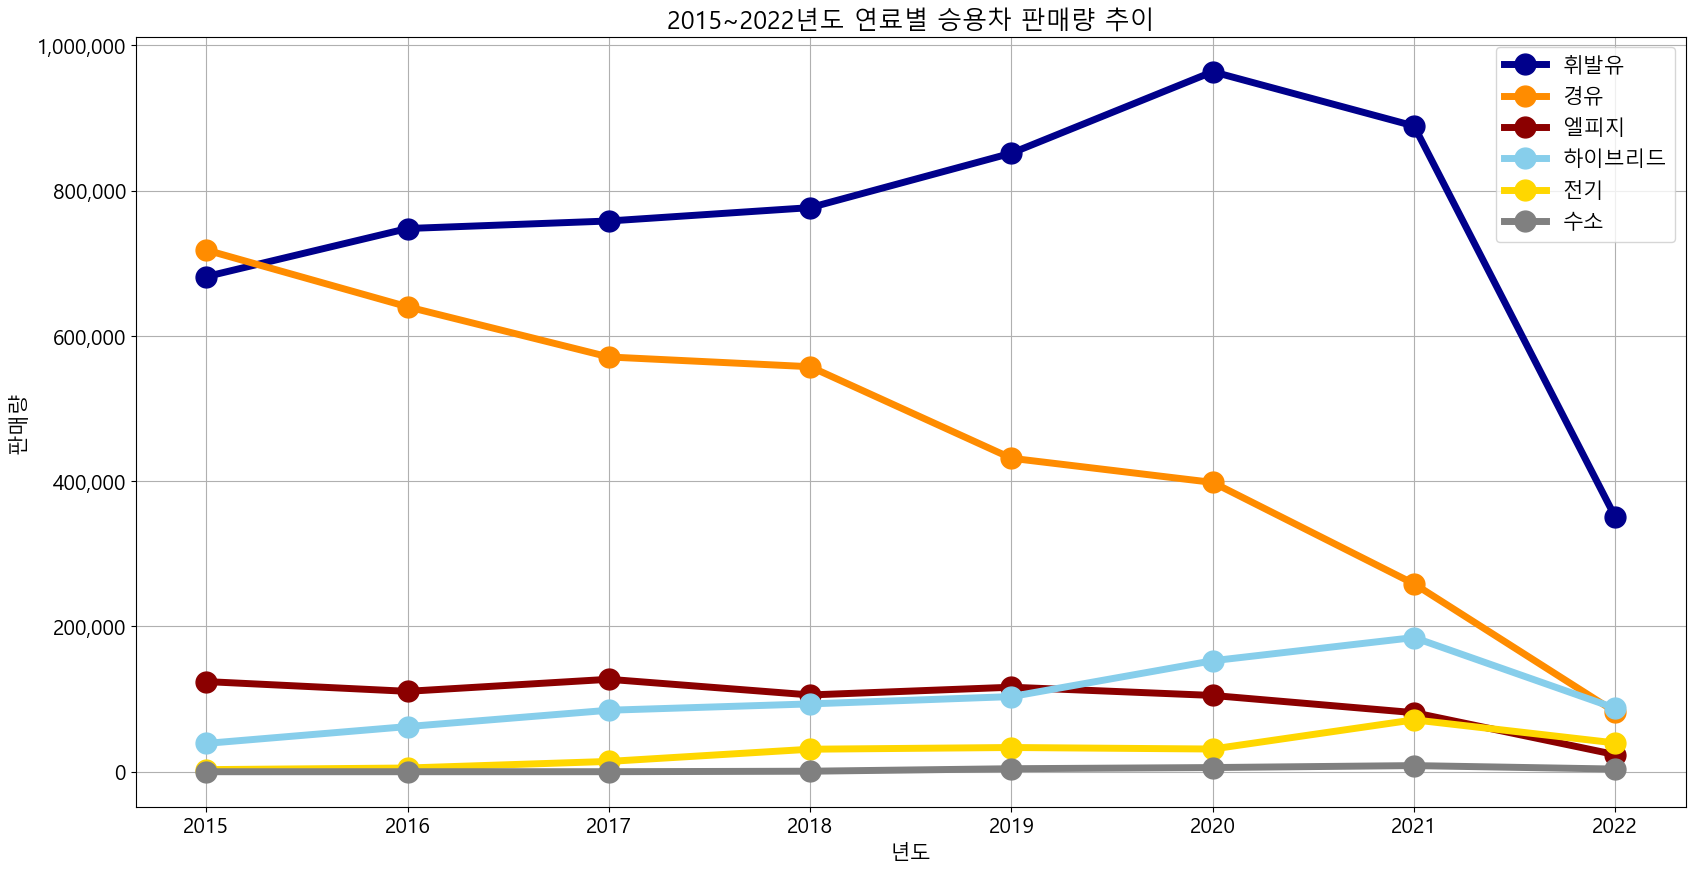

In [146]:
plt.rcParams['figure.figsize'] = (20,10)

plt.rcParams['lines.linewidth'] = 5

plt.rc('font', family = 'Malgun Gothic', size = 15)

plt.plot(df_15['휘발유'], color = 'darkblue', marker = 'o', ms = 15, label = '휘발유')
plt.plot(df_15['경유'], color = 'darkorange', marker = 'o', ms = 15, label = '경유')
plt.plot(df_15['엘피지'], color = 'darkred', marker = 'o', ms = 15, label = '엘피지')
plt.plot(df_15['하이브리드'], color = 'skyblue', marker = 'o', ms = 15, label = '하이브리드')
plt.plot(df_15['전기'], color = 'gold', marker = 'o', ms = 15, label = '전기')
plt.plot(df_15['수소'], color = 'gray', marker = 'o', ms = 15, label = '수소')


plt.title('2015~2022년도 연료별 승용차 판매량 추이')
plt.xlabel('년도')
plt.ylabel('판매량')

a = [2015,2016,2017,2018,2019,2020,2021,2022]
plt.xticks([0,1,2,3,4,5,6,7], a)

# 천단위콤마
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.legend(loc='upper right')

plt.grid(True)

plt.show()

In [ ]:
'''
2022년도 수치를 확인해보면 휘발유 차량 판매량이 가장 높게 나타났으나
최근 7~8년간 처음으로 경유, 엘피지 차량 판매량보다 하이브리드, 전기 차량의 판매량이 높게나타났다.

친환경차량에 대한 관심이 증가하고 있는 것으로 판단된다.
'''

In [ ]:
'''
경유, 엘피지 매연차량과 친환경차량의 판매량을 살펴보자.
'''

In [52]:
# 매연차량 vs 친환경차량
df_15['매연차량'] = df_15['경유'] + df_15['엘피지']
df_15['친환경차량'] = df_15['하이브리드'] + df_15['전기'] + df_15['수소']

In [53]:
df2 = df_15[['매연차량', '친환경차량']]

C:\Users\admin\AppData\Local\Temp\ipykernel_7892\4089190429.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


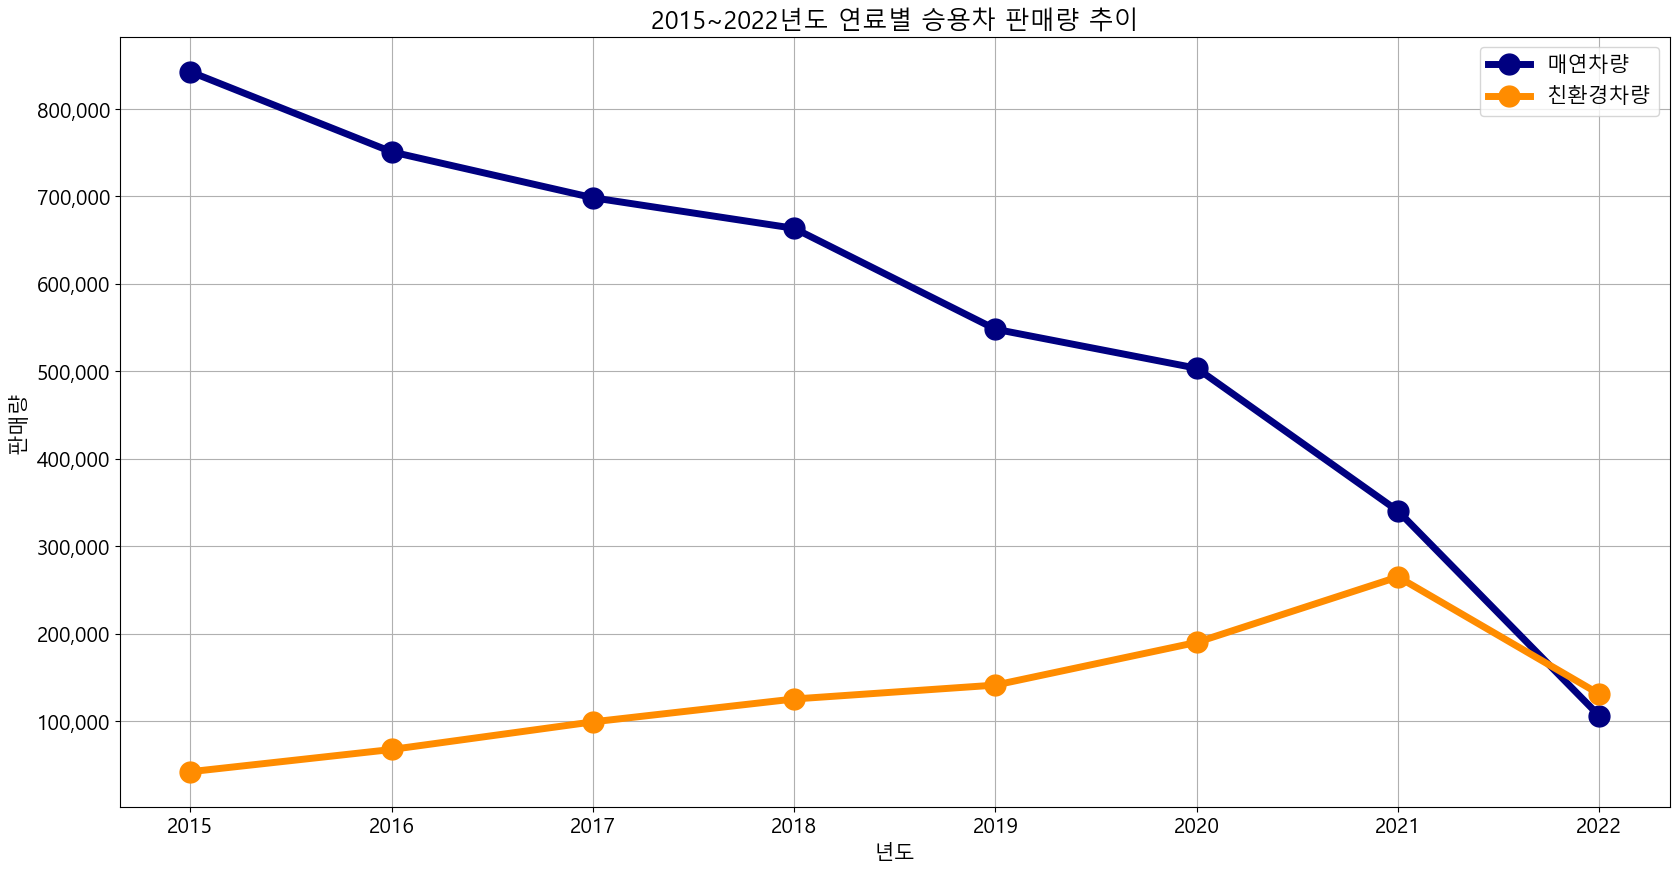

In [147]:
plt.rcParams['figure.figsize'] = (20,10)

plt.rcParams['lines.linewidth'] = 5

plt.rc('font', family = 'Malgun Gothic', size = 15)

plt.plot(df2['매연차량'], color = 'navy', marker = 'o', ms = 15, label = '매연차량')
plt.plot(df2['친환경차량'], color = 'darkorange', marker = 'o', ms = 15, label = '친환경차량')

plt.title('2015~2022년도 연료별 승용차 판매량 추이')
plt.xlabel('년도')
plt.ylabel('판매량')

a = [2015,2016,2017,2018,2019,2020,2021,2022]
plt.xticks([0,1,2,3,4,5,6,7], a)

# 천단위콤마
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.legend(loc='upper right')

plt.grid(True)

plt.show()

In [ ]:
'''
친환경 차량의 관심이 증가하는 만큼 경유, 엘피지 차량이 줄어들고있다.
점차 친환경차량 판매량이 매연차량(경유, 엘피지)을 추월할 것으로 예상된다.
'''